In [1]:
from MyNeuralClassifier import *
from ds_functions import *
from sklearn.datasets import fetch_mldata

hl_sizes = (200,50)
lam = 3
maxiter = 600
tol = 1e-6
solver = 'L-BFGS-B'  # ‘CG’ 'BFGS' 'L-BFGS-B'

In [2]:
mnist = fetch_mldata('MNIST original')
X = mnist.data
y = mnist.target

X_tr, X_ts, y_tr, y_ts = train_test_split(X, y.reshape(-1), test_size=0.1)
sorted_classes = np.unique(y).tolist()

In [3]:
my_nn = MyNeuralClassifier(hl_sizes, lam, maxiter, tol, solver)

# fit model
start_time = time()
my_nn.fit(X_tr, y_tr)
print('Fitting completed in {0} seconds'.format(time() - start_time))

Fitting completed in 6060.978647232056 seconds


0.9904761904761905
             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      6190
        1.0       1.00      0.99      0.99      7103
        2.0       0.99      0.99      0.99      6296
        3.0       0.99      0.98      0.98      6437
        4.0       0.99      0.99      0.99      6144
        5.0       0.99      0.99      0.99      5690
        6.0       0.99      0.99      0.99      6193
        7.0       0.99      0.99      0.99      6567
        8.0       0.98      0.99      0.99      6125
        9.0       0.99      0.99      0.99      6255

avg / total       0.99      0.99      0.99     63000



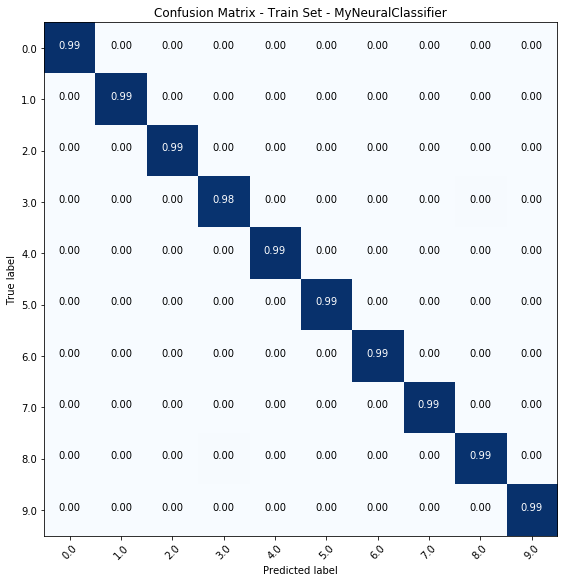

0.9601428571428572
             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98       713
        1.0       0.98      0.99      0.98       774
        2.0       0.95      0.97      0.96       694
        3.0       0.95      0.93      0.94       704
        4.0       0.96      0.96      0.96       680
        5.0       0.92      0.96      0.94       623
        6.0       0.97      0.97      0.97       683
        7.0       0.96      0.96      0.96       726
        8.0       0.96      0.93      0.95       700
        9.0       0.96      0.94      0.95       703

avg / total       0.96      0.96      0.96      7000



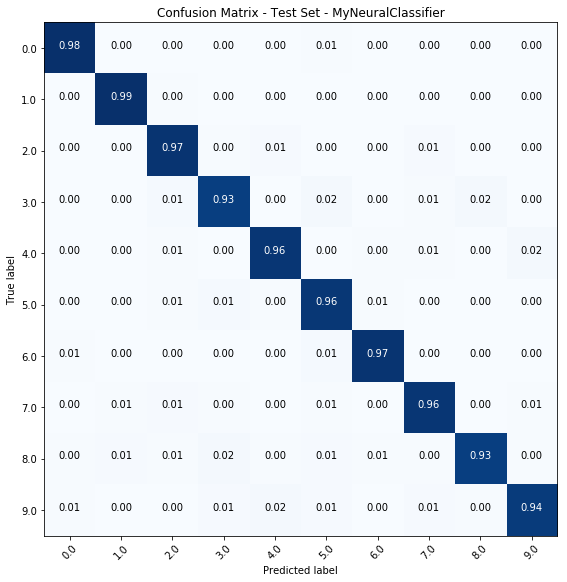

In [10]:
# get predictions
pred_tr = my_nn.predict(X_tr)
pred_ts = my_nn.predict(X_ts)

# get score and classification report
score_tr = np.mean((pred_tr == y_tr))
score_ts = np.mean((pred_ts == y_ts))

cr_tr = classification_report(y_tr, pred_tr)
cr_ts = classification_report(y_ts, pred_ts)

print(score_tr)
print(cr_tr)
p = cm_plot(confusion_matrix(y_tr, pred_tr), 
            classes=sorted_classes, 
            title='Confusion Matrix - Train Set - MyNeuralClassifier', 
            cmap=plt.cm.Blues, normalize=True, cbar=False)
plt.show()

print(score_ts)
print(cr_ts)

p = cm_plot(confusion_matrix(y_ts, pred_ts), 
            classes=sorted_classes, 
            title='Confusion Matrix - Test Set - MyNeuralClassifier', 
            cmap=plt.cm.Blues, normalize=True, cbar=False)
plt.show()

Fitting completed in 700.3855333328247 seconds
             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98       713
        1.0       0.99      0.99      0.99       774
        2.0       0.95      0.97      0.96       694
        3.0       0.95      0.96      0.96       704
        4.0       0.97      0.97      0.97       680
        5.0       0.95      0.96      0.95       623
        6.0       0.98      0.98      0.98       683
        7.0       0.97      0.97      0.97       726
        8.0       0.97      0.94      0.95       700
        9.0       0.96      0.95      0.95       703

avg / total       0.97      0.97      0.97      7000



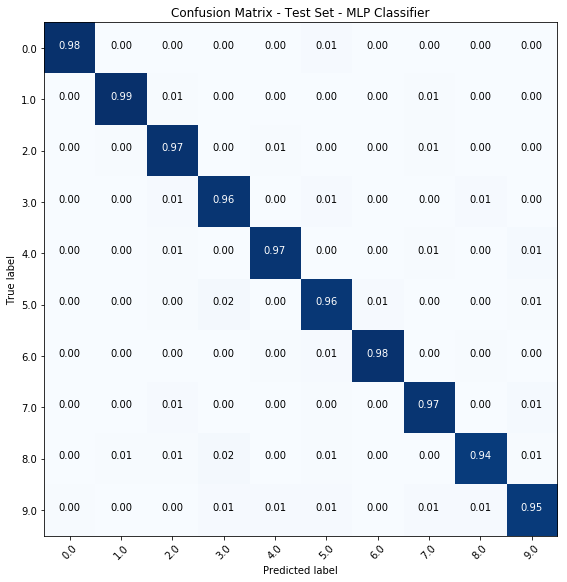

In [11]:
# my classifier vs sklearn's MLP, using same params
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hl_sizes, max_iter=maxiter, shuffle=False, solver='lbfgs', tol=tol)

start_time = time()
mlp.fit(X_tr, y_tr)
print('Fitting completed in {0} seconds'.format(time() - start_time))

pred_mlp = mlp.predict(X_ts)
print(classification_report(y_ts, pred_mlp))

p = cm_plot(confusion_matrix(y_ts, pred_mlp), 
            classes=sorted_classes, 
            title='Confusion Matrix - Test Set - MLP Classifier',
            cmap=plt.cm.Blues, normalize=True, cbar=False)
plt.show()


In [12]:
# save results

save_pickle(my_nn, 'my_nn.pkl.bz2', bz2)